# Método de Euler Implícito 

Queremos resolver o seguinte problema 

$$ \frac{dx}{dt} = f(x,t); x(t=0) = x_o $$


Vamos utilizar a expansão em série de taylor, porém de $x(t + \Delta t)$ para $x(t)$, logo com $\Delta t < 0$:

$$  x(t) = x(t + \Delta t) - \frac{dx(t + \Delta t)}{dt}\Delta t  + O(\Delta t^2)$$

Em 1 ordem:

$$ x(t + \Delta t) = x(t) + \frac{dx(t + \Delta t)}{dt}\Delta t$$

Como $\frac{dx}{dt} = f(x,t)$:

$$ x(t + \Delta t) = x(t) + f((t + \Delta t),t + \Delta t)\Delta t $$

Em forma de indices:

$$ x_{i+1} = x_i + f(x_{i+1},t_{i+1})\Delta t $$


**Método implícito é mais estável que o explícito**

In [6]:
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
def analytical_model(x_o,t,tau):
  return x_o*np.exp(-t/tau)

def euler_explicit(x,tau,dt):

  return x - (x/tau)*dt 

def euler_implicit(x,tau,dt):
 
  return x/(1 + dt/tau)


tau = 2
x_o = 100
tf = 10



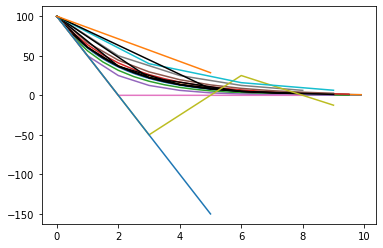

In [8]:
dt = [0.1,0.5,1,2,3
      ]

for dti in dt:
  t = np.arange(0,10,dti) 
  x_analytic = analytical_model(x_o,t,tau)
  x_euler_explicit = []
  x_euler_implicit = []
  for t_i in t: 
    if t_i == 0:
      x_euler_explicit.append(x_o)
      x_euler_implicit.append(x_o)
    else:
      x_i_explicit = euler_explicit(x_euler_explicit[-1],tau,dti)
      x_i_implicit = euler_implicit(x_euler_implicit[-1],tau,dti)

      x_euler_explicit.append(x_i_explicit)
      x_euler_implicit.append(x_i_implicit)
  
  #plt.title('dt={0}'.format(dti))
  plt.plot(t,x_analytic,label="analytical model - dt={0}".format(dti),color='black')
  plt.plot(t,x_euler_explicit)
  plt.plot(t,x_euler_implicit)

#plt.legend()
plt.show()
  